In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#grid 3586 - working area
#grid 4283 - transport area
#grid 5339 - home area

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
dfs = dfs.fillna(0)
del(df)

In [3]:
#Group by hours and aggregate values according to the hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+dfgr.time.dt.minute/60+24*(dfgr.time.dt.day-1)
dfgr = dfgr.set_index(['hour']).sort_index()
del(dfs)

In [4]:
dfgr.head()

,time,cellid,smsin,smsout,callin,callout,internet
hour,,,,,,,
0.0,2013-11-01,1,0.223227,0.156787,0.160938,0.052275,11.028366
0.0,2013-11-01,2,0.222201,0.147617,0.164946,0.054712,11.058225
0.0,2013-11-01,3,0.221109,0.137855,0.169213,0.057306,11.090008
0.0,2013-11-01,4,0.226198,0.183349,0.149327,0.045216,10.941881
0.0,2013-11-01,5,0.205065,0.175393,0.139139,0.043455,9.916548


In [5]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

In [6]:
print("CELL 3586 - office area")

CELL 3586 - office area


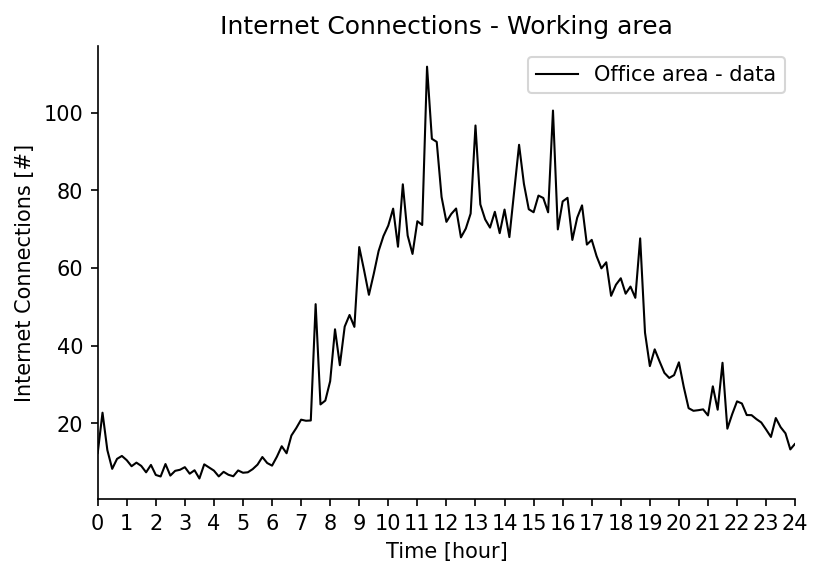

In [7]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==3586]['internet']
xdatai1 = dfgr[dfgr.cellid==3586]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
plt.savefig('./wday-time/int-work.png')
plt.show()

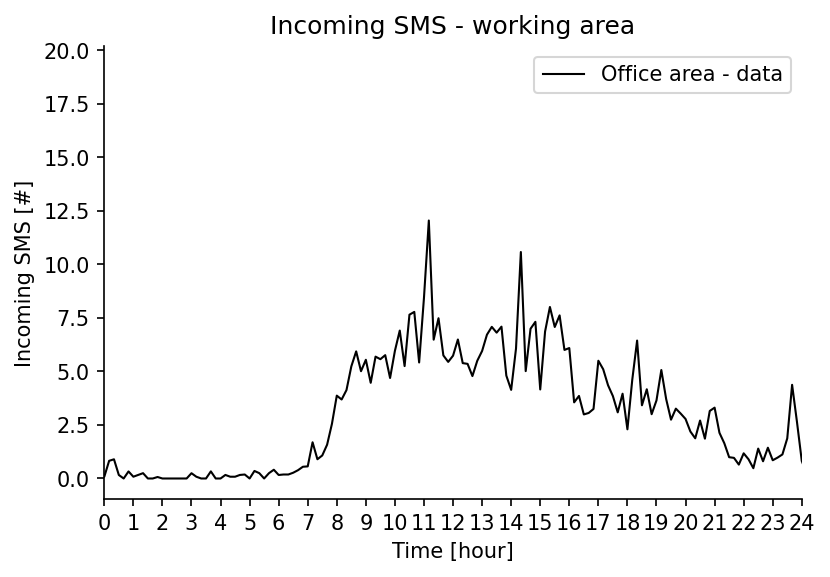

In [8]:

ydatasi1 = dfgr[dfgr.cellid==3586]['smsin']
xdatasi1 = dfgr[dfgr.cellid==3586]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-work.png')
plt.show()

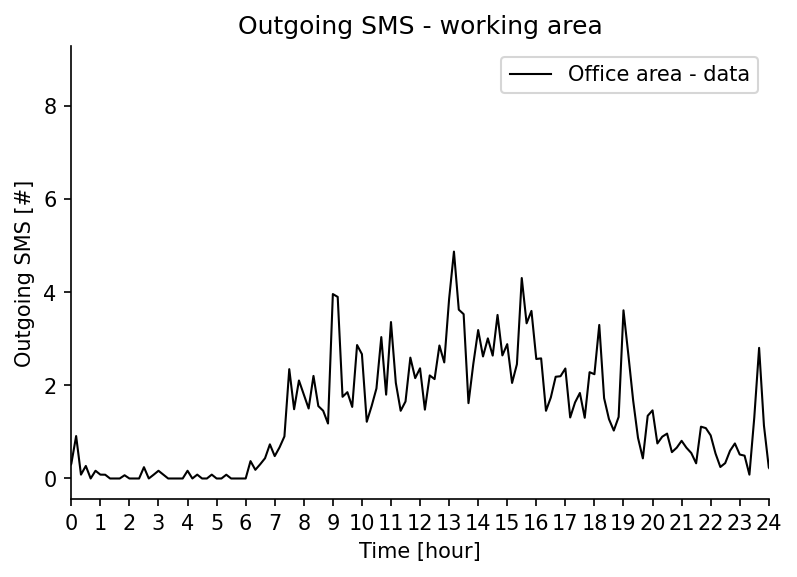

In [9]:

ydataso1 = dfgr[dfgr.cellid==3586]['smsout']
xdataso1 = dfgr[dfgr.cellid==3586]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-work.png')
plt.show()

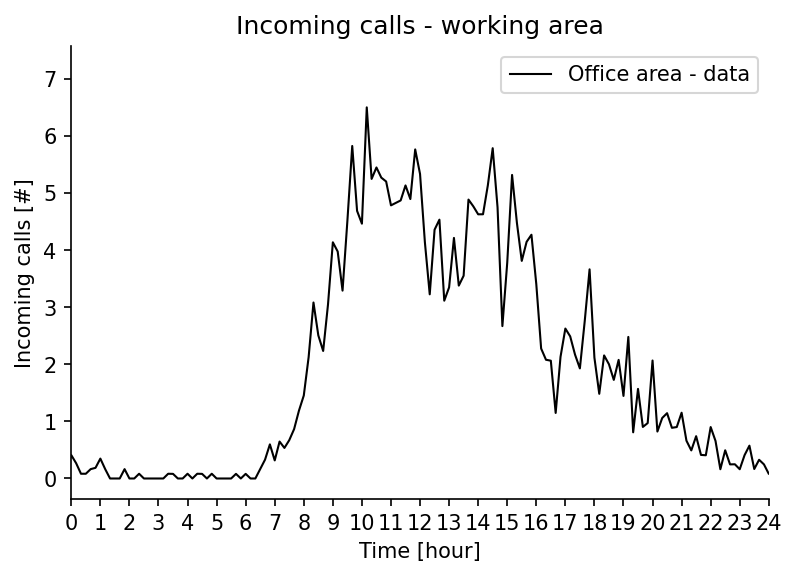

In [10]:

ydataci1 = dfgr[dfgr.cellid==3586]['callin']
xdataci1 = dfgr[dfgr.cellid==3586]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-work.png')
plt.show()

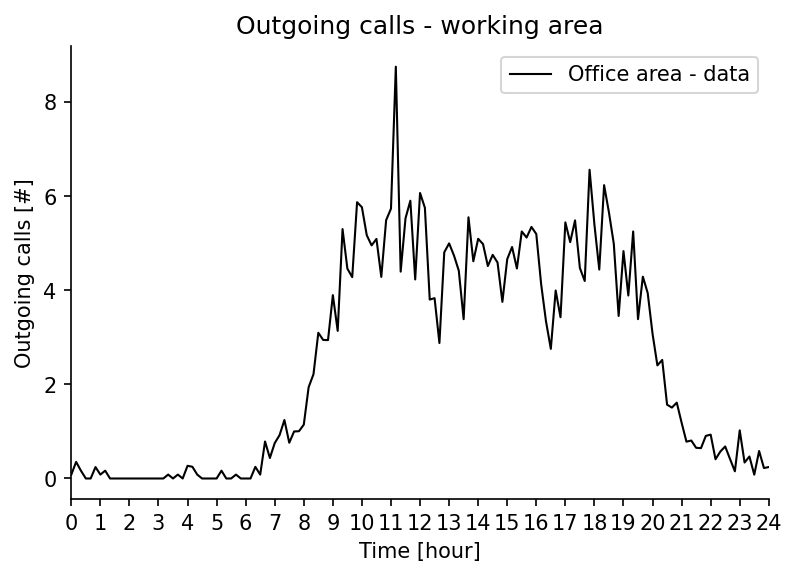

In [11]:

ydataco1 = dfgr[dfgr.cellid==3586]['callout']
xdataco1 = dfgr[dfgr.cellid==3586]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-work.png')
plt.show()

In [12]:
print("CELL 4283 - transport area - highway")

CELL 4283 - transport area - highway


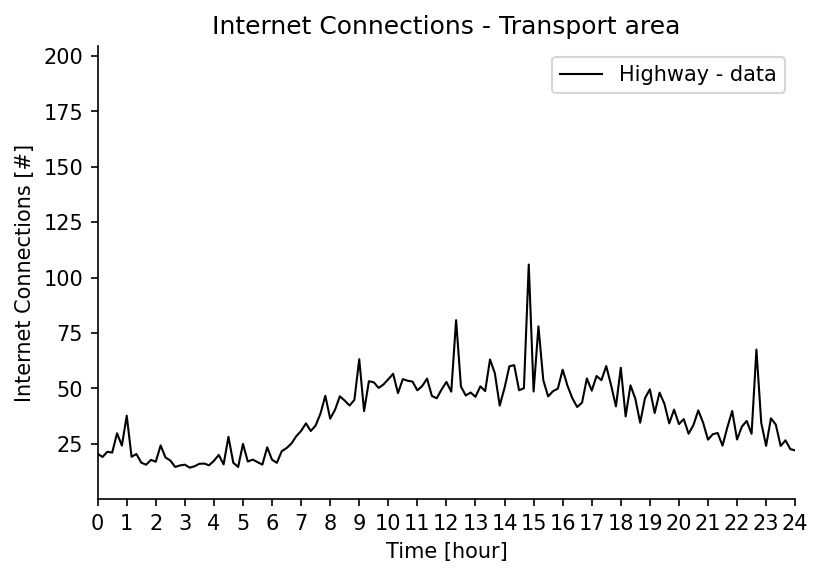

In [13]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==4283]['internet']
xdatai2 = dfgr[dfgr.cellid==4283]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/int-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/int-trans.png')
plt.show()

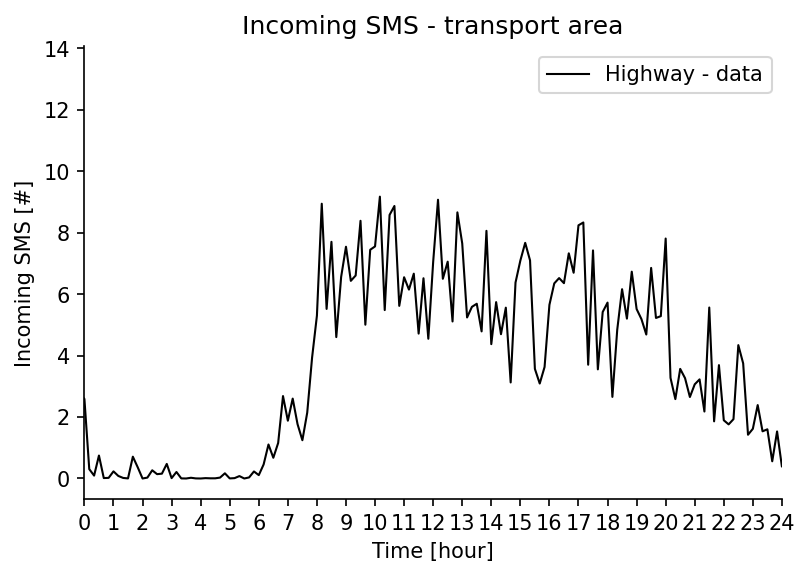

In [14]:

ydatasi2 = dfgr[dfgr.cellid==4283]['smsin']
xdatasi2 = dfgr[dfgr.cellid==4283]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-trans.png')
plt.show()

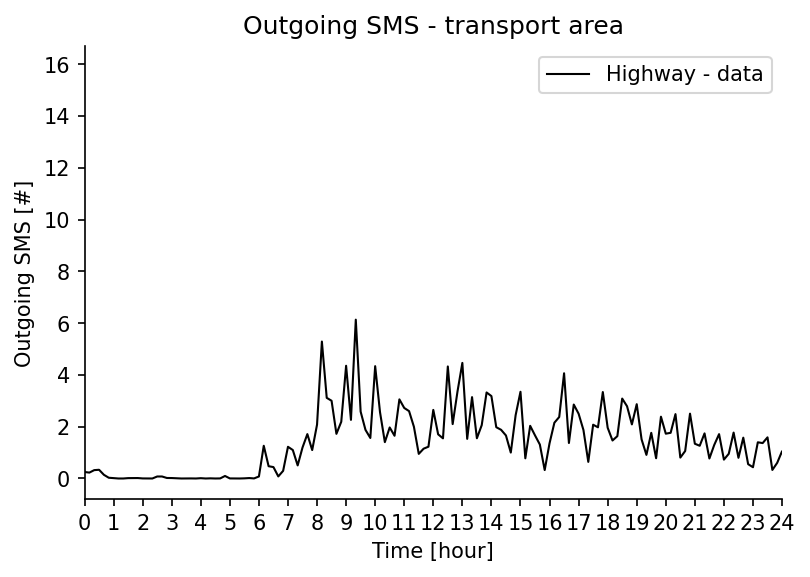

In [15]:

ydataso2 = dfgr[dfgr.cellid==4283]['smsout']
xdataso2 = dfgr[dfgr.cellid==4283]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-trans.png')
plt.show()

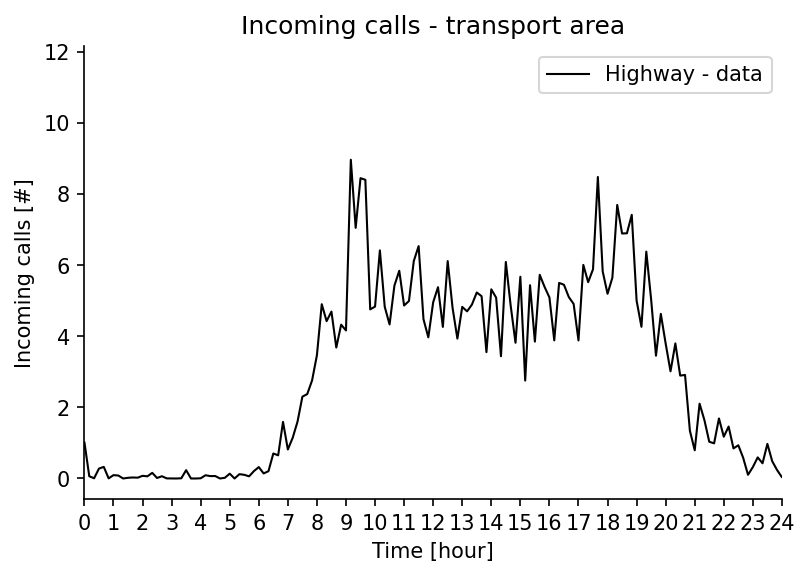

In [16]:

ydataci2 = dfgr[dfgr.cellid==4283]['callin']
xdataci2 = dfgr[dfgr.cellid==4283]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-trans.png')
plt.show()

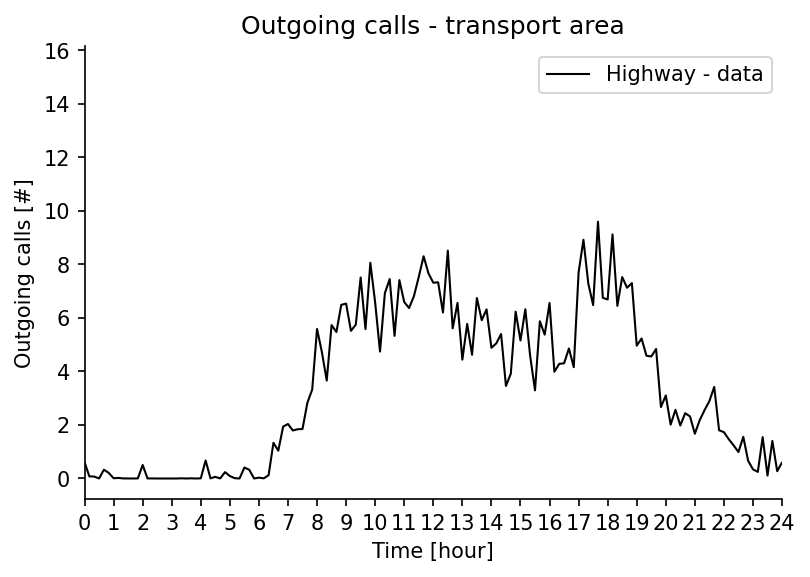

In [17]:

ydataco2 = dfgr[dfgr.cellid==4283]['callout']
xdataco2 = dfgr[dfgr.cellid==4283]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-trans.png')
plt.show()

In [18]:
print("CELL 5343 - home area - Via Rembrandt")

CELL 5343 - home area - Via Rembrandt


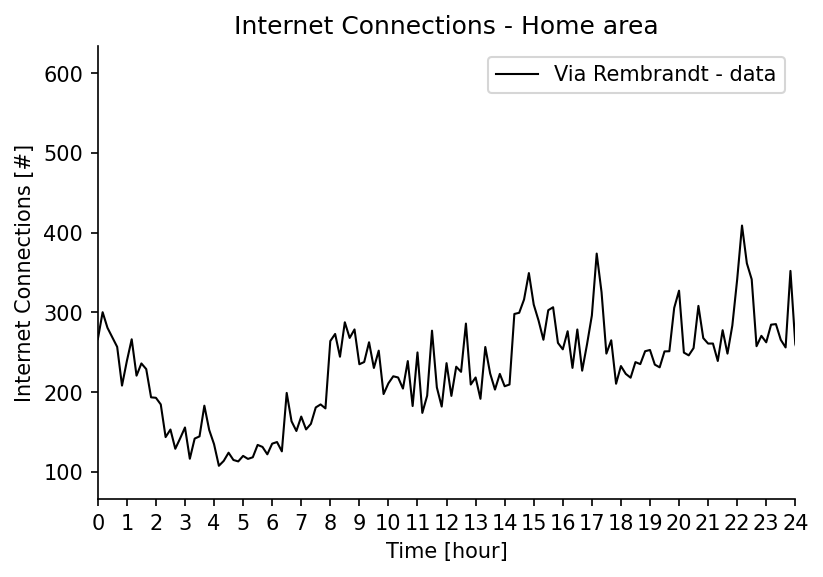

In [19]:
#Home area (near Via Rembrandt) data
ydatai3 = dfgr[dfgr.cellid==5343]['internet']
xdatai3 = dfgr[dfgr.cellid==5343]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/int-home-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/int-home.png')
plt.show()

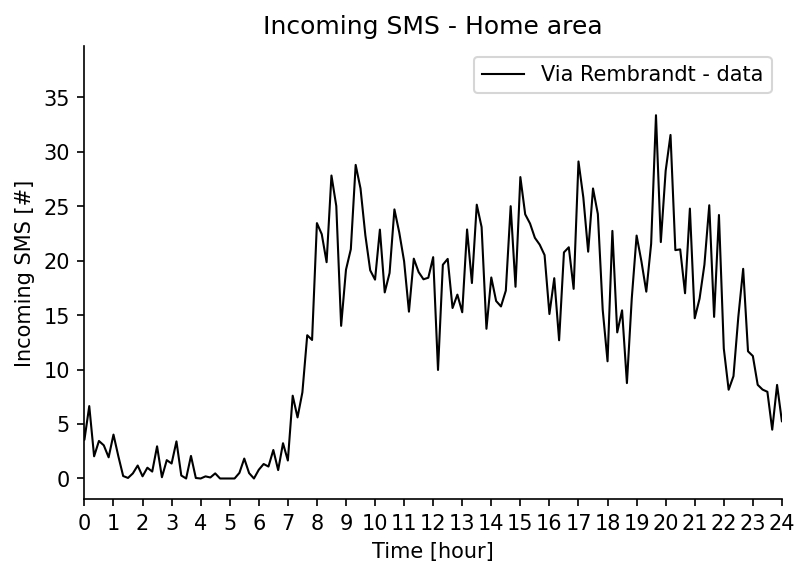

In [20]:

ydatasi3 = dfgr[dfgr.cellid==5343]['smsin']
xdatasi3 = dfgr[dfgr.cellid==5343]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-home.png')
plt.show()

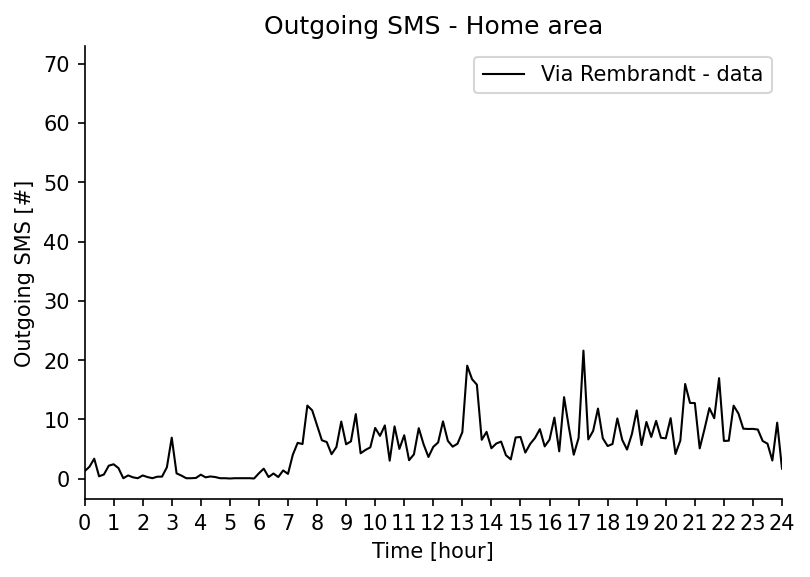

In [21]:

ydataso3 = dfgr[dfgr.cellid==5343]['smsout']
xdataso3 = dfgr[dfgr.cellid==5343]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-home.png')
plt.show()

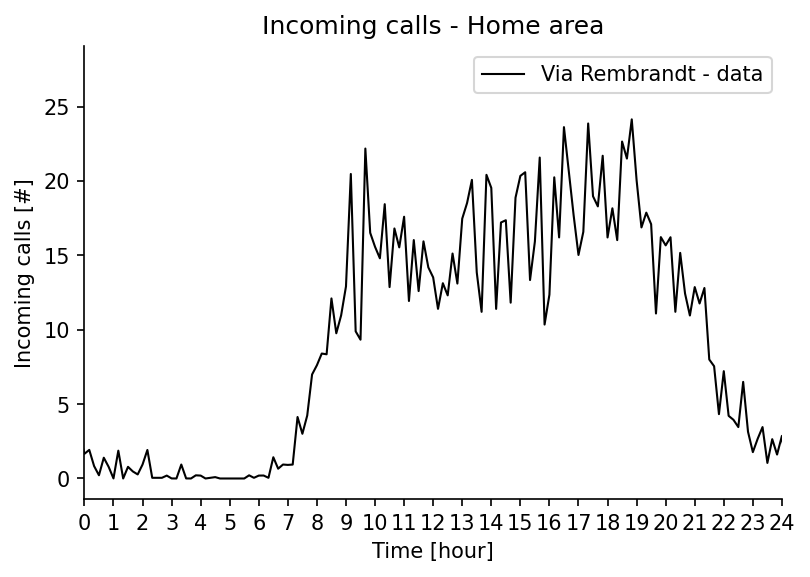

In [22]:

ydataci3 = dfgr[dfgr.cellid==5343]['callin']
xdataci3 = dfgr[dfgr.cellid==5343]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-home.png')
plt.show()

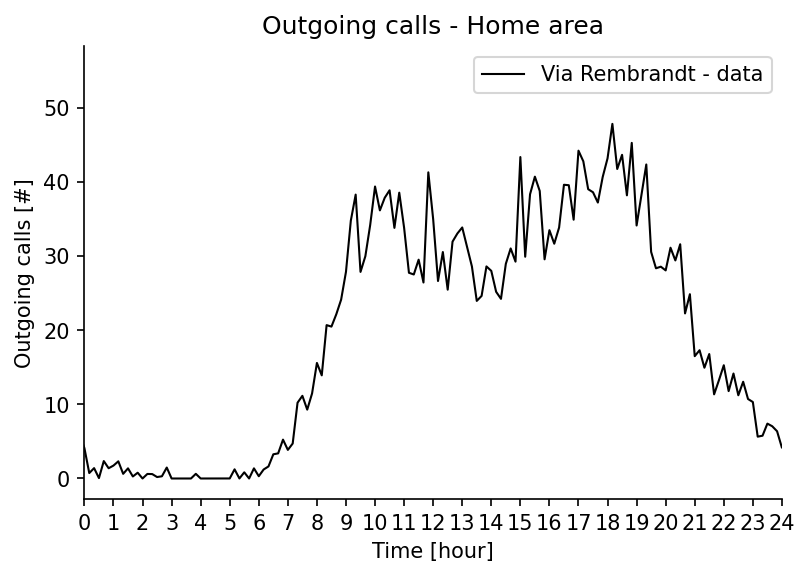

In [23]:

ydataco3 = dfgr[dfgr.cellid==5343]['callout']
xdataco3 = dfgr[dfgr.cellid==5343]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-home.png')
plt.show()

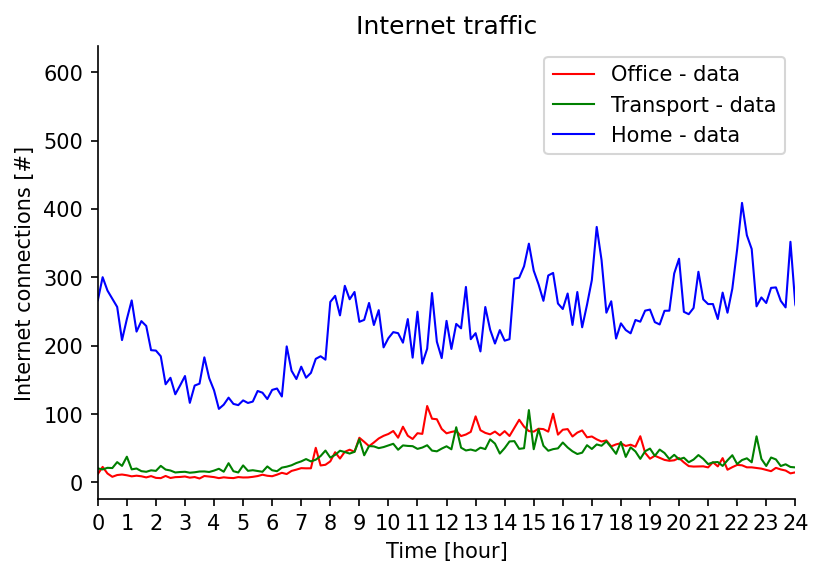

In [24]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatai2, ydatai2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatai3, ydatai3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Internet traffic")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/internet-comparative.png')
plt.show()

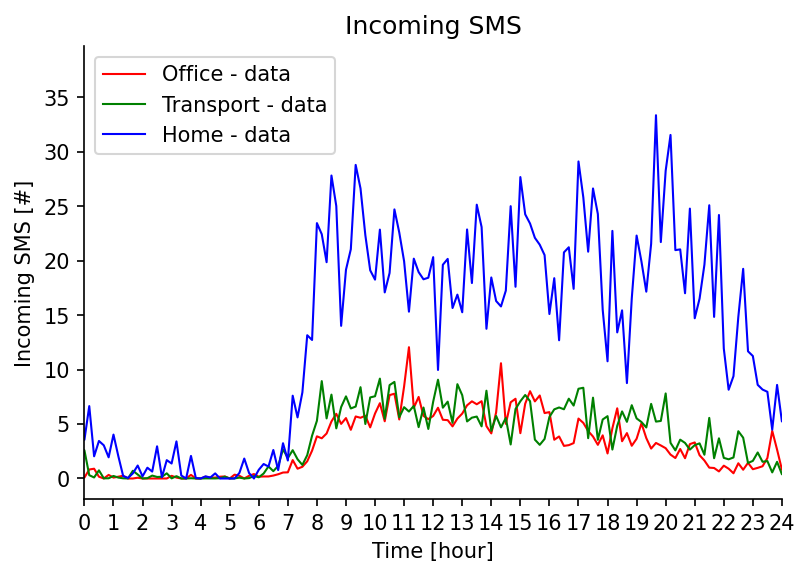

In [25]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatasi2, ydatasi2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatasi3, ydatasi3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-comparative.png')
plt.show()

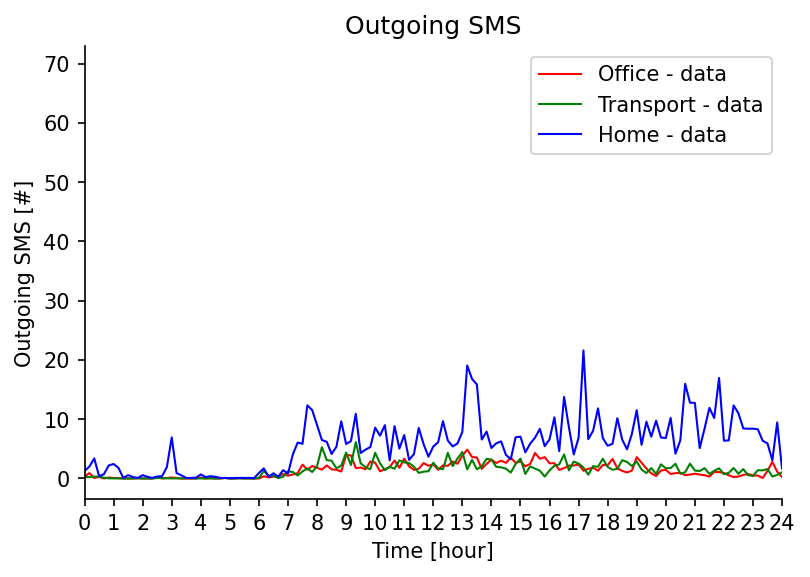

In [26]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataso2, ydataso2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataso3, ydataso3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-comparative.png')
plt.show()

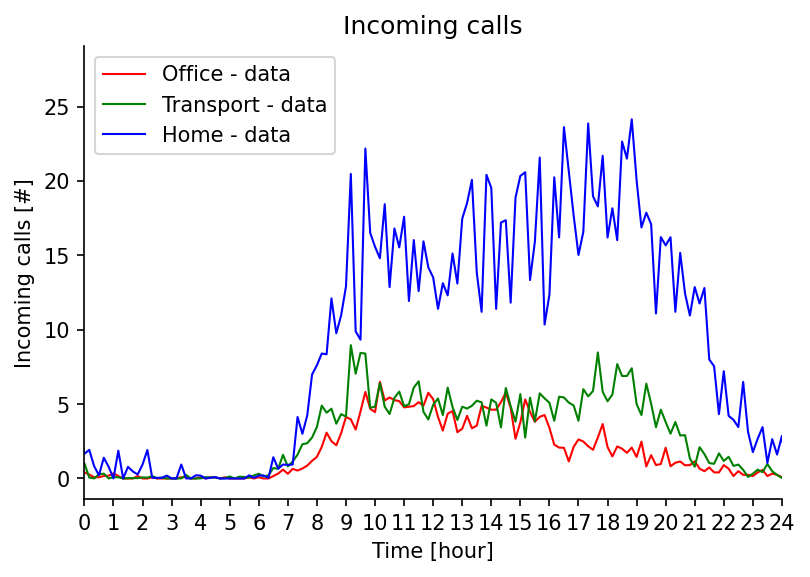

In [27]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataci2, ydataci2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataci3, ydataci3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming calls")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-comparative.png')
plt.show()

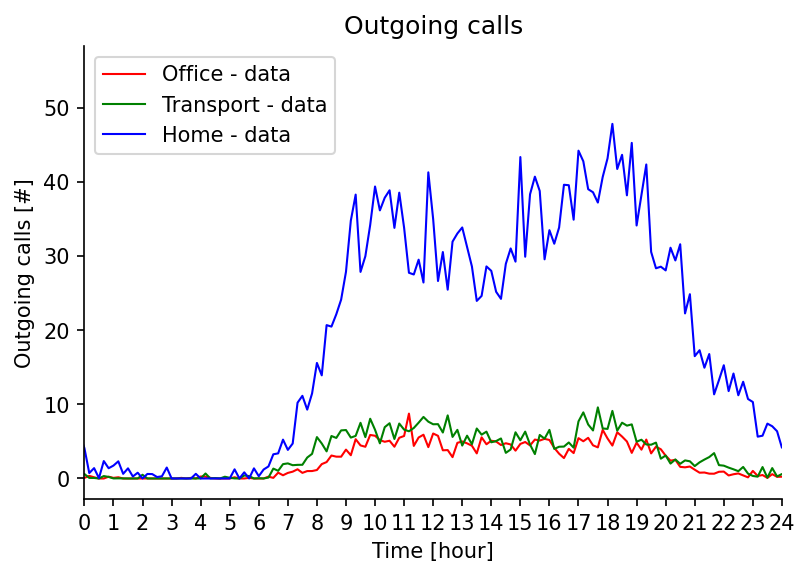

In [28]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataco2, ydataco2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataco3, ydataco3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing calls")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-comparative.png')
plt.show()